# Part II - (Ford GoBike System Data)
## by (Yixin Zhang)


## Investigation Overview


> In this project, I'm interested in leveraging differnt visualization tools to do some in-depth analysis about the features in the dataset and figuring out what factors may affect bike usage.



## Dataset Overview

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [12]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [20]:
# load in the dataset into a pandas dataframe
df = pd.read_pickle('file.pkl')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,duration_min,duration_hr,month,day,hour,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,869.750000,14.495833,February,Thursday,17,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,1030.900000,17.181667,February,Thursday,12,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,608.166667,10.136111,February,Thursday,17,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,26.416667,0.440278,February,Thursday,23,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,Subscriber,1959,Male,No,29.883333,0.498056,February,Thursday,23,60


## Distribution of trip duration

> This figure shows the trip duration (sec) time distribution.

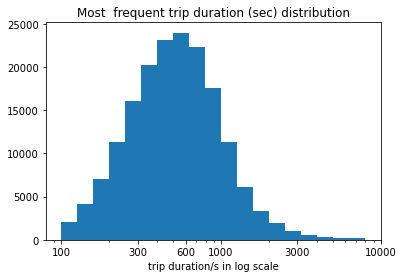

In [21]:
# histogra of duration (log scale)
bins = 10 ** np.arange(2, 4, 0.1)
plt.hist(data = df, x = 'duration_sec', bins = bins)
ticks = [100,300,600,1000,3000,10000]
labels = ['{}'.format(v) for v in ticks]
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('trip duration/s in log scale')
plt.title('Most  frequent trip duration (sec) distribution');

## User type composition

> About 90% of recored users are subscriber.

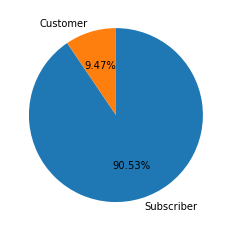

In [22]:
sorted_counts = df['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.2f%%');

## Bike daily usage counts by customer types
> Daily usage counts tendency is same in both customer and subscriber group. Weekdays have higher counts than weekends.


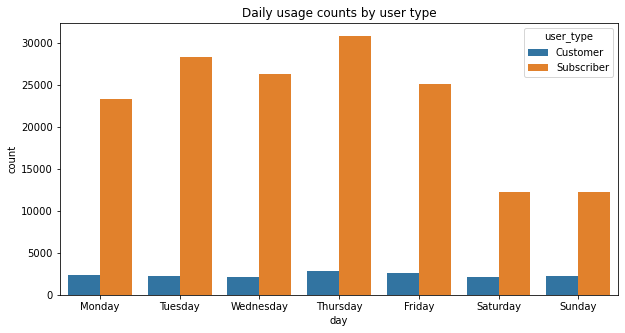

In [26]:
df['month'] = df['start_time'].dt.month_name()
df['day'] = df['start_time'].dt.day_name()
df['hour'] = df['start_time'].dt.hour
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
plt.figure(figsize = (10,5))
sb.countplot(data = df, x = 'day', hue ='user_type', order = order)
plt.title('Daily usage counts by user type');

## Bike hourly usage counts by customer types
> Hourly usage counts tendency is same in both customer and subscriber group. In rush hours (8am and 5pm), usage counts are the highest.

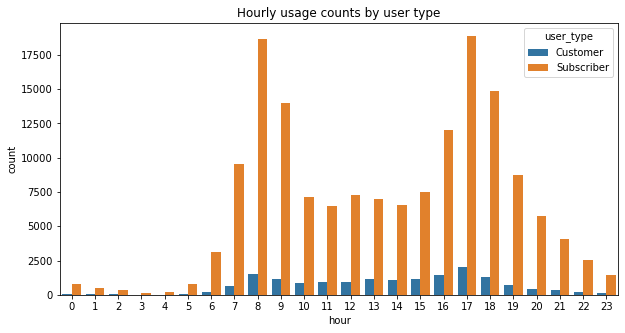

In [27]:
plt.figure(figsize = (10,5))
order = np.arange(0,24)
sb.countplot(data = df, x = 'hour', hue ='user_type', order =order)
plt.title('Hourly usage counts by user type');

## Heatmap of Daily usage counts versus hourly usage counts by user types
> This result is consistent with above two figures, that both "customer" and "subscriber" have relatively high bike usage in weekdays and in rush hours (8am and 5pm).

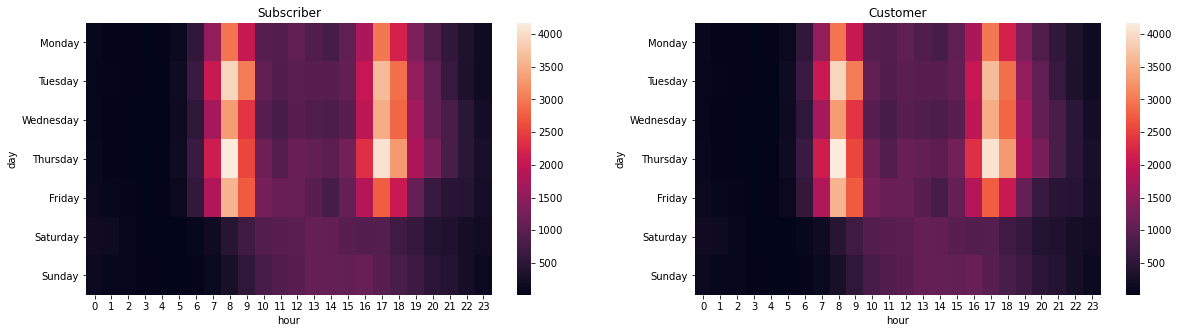

In [31]:
# subscriber
df_sub = subscriber.groupby(['hour','day'], as_index=False).size().reset_index()
index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sub_counts = df_sub.pivot(index = 'day', columns = 'hour', values = 'size')
sub_counts = sub_counts.reindex(index = index)

# customer
df_cus = customer.groupby(['hour','day'], as_index=False).size().reset_index()
index = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
cus_counts = df_sub.pivot(index = 'day', columns = 'hour', values = 'size')
cus_counts = sub_counts.reindex(index = index)

plt.figure(figsize = (20,5))

# subplot of subscriber
plt.subplot(1,2,1)
sb.heatmap(sub_counts)
plt.title('Subscriber')

# subplot of customer
plt.subplot(1,2,2)
sb.heatmap(cus_counts)
plt.title('Customer');

## Top 10 most visited start stations by user groups
> Top 10 most visited start stations are not same in "customer" and "subscriber" users.

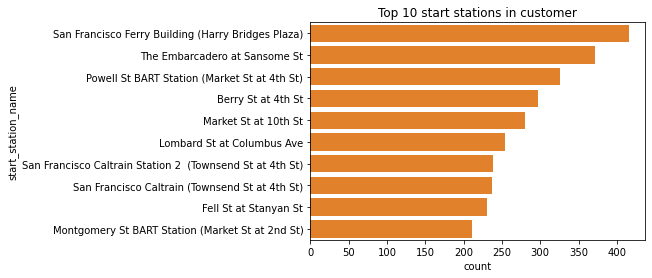

In [29]:
# cusomer group
customer = df.query('user_type == "Customer"')
subscriber = df.query('user_type == "Subscriber"')
cus_station = customer['start_station_name'].value_counts()[0:10]
color1 = sb.color_palette()[1]
sb.countplot(data = customer, y = 'start_station_name',order = cus_station.index, color = color1)
plt.title('Top 10 start stations in customer');

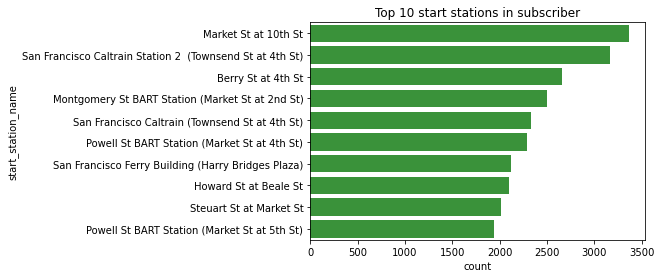

In [30]:
# subscriber group
sub_station = subscriber['start_station_name'].value_counts()[0:10]
color2 = sb.color_palette()[2]
sb.countplot(data = subscriber, y = 'start_station_name',order = sub_station.index, color = color2)
plt.title('Top 10 start stations in subscriber');

## Average daily usage time by user types
> In average, "customer" users have higher usage time than "subscriber" users. For both two types of users, average usage time is higher in weekends than weekdays.

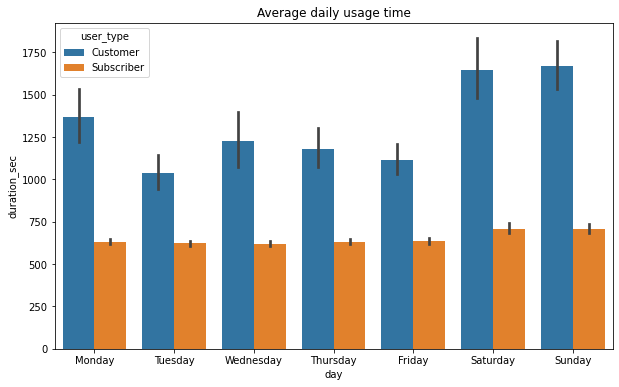

In [32]:
plt.figure(figsize = (10,6))
order = ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
sb.barplot(data = df, x = 'day', y = 'duration_sec', hue = 'user_type', order = order)
plt.title('Average daily usage time');

## Average daily usage time by user types
> Surpurisingly, for both two types of users, morning 3 am has the higest average usage time durations.

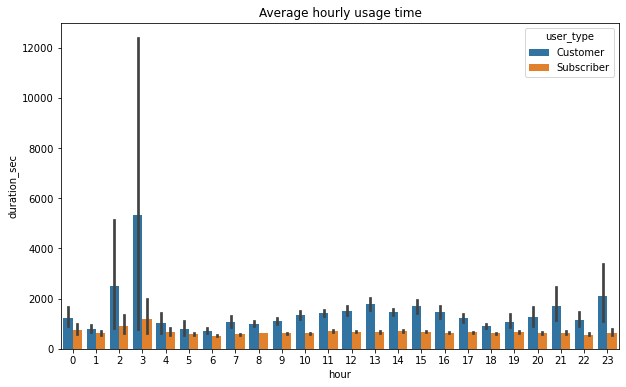

In [33]:
plt.figure(figsize = (10,6))
order = np.arange(0,24)
sb.barplot(data = df, x = 'hour', y = 'duration_sec', hue = 'user_type', order = order)
plt.title('Average hourly usage time');

### Summary
> 90% users are subscriber

> Users including both "customer" and "subscriber" use Ford GoBike more frequently in weekdays, especially in rush hours (8am and 5pm), but the average usage time is higher in weekends and in 3am !

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [1]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

^C


### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
